### Eigenvalue & Eigenvector with numpy

In [68]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt


testmatrix = np.array([[2,1],
                        [1,2]])


In [69]:
#Eigenvalue
eigen_value=lin.eig(testmatrix)[0]  
#Eigenvector
eigen_vector=lin.eig(testmatrix)[1]

print('eigen_value: ',eigen_value)
print('eigen_vector: ',eigen_vector)

eigen_value:  [3. 1.]
eigen_vector:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [70]:
eigen_value_L1=eigen_value[0]
eigen_value_L2=eigen_value[1]
eigen_vector_k1=eigen_vector[:,0]
eigen_vector_k2=eigen_vector[:,1]

print('Lamda_1: ',eigen_value_L1)
print('eigen_value_1에 따른 eigen_vector: ',eigen_vector_k1)
print('Lamda_2: ',eigen_value_L2)
print('eigen_value_2에 따른 eigen_vector: ',eigen_vector_k2)

Lamda_1:  3.0
eigen_value_1에 따른 eigen_vector:  [0.70710678 0.70710678]
Lamda_2:  1.0
eigen_value_2에 따른 eigen_vector:  [-0.70710678  0.70710678]


In [71]:
# k0'*k0 = 1 : 단위 벡터
eigen_vector_k1.dot(eigen_vector_k1.T)

0.9999999999999998

In [72]:
# k1'*k1 = 1 : 단위 벡터
eigen_vector_k2.dot(eigen_vector_k2.T)

0.9999999999999998

### PCA 간단예제

In [73]:
import pandas as pd
np.random.seed(0)

In [74]:
# 랜덤값 생성
x1 = np.random.randn(100)
x2 = 0.5*x1 + np.random.randn(100)*0.3
#print(x1)
#print(x2)
X = pd.DataFrame({'x1':x1,'x2':x2})

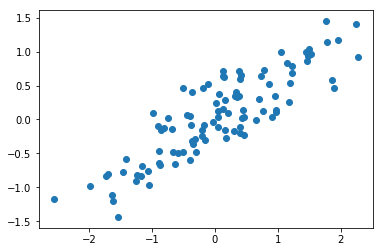

In [75]:
plt.scatter(X['x1'],X['x2'])

In [76]:
# 공분산행렬
cov_mat = X.cov()
cov_mat

,x1,x2
x1,1.026087,0.548351
x2,0.548351,0.389150


### 공분산행렬 변환

- 2차원 공간벡터와 구한 cov_mat을 내적해주면

- X 데이터와 같은 직선형태로 변환됨

- 이는 cov_mat이 X데이터의 선형성을 지니고 있기 때문에 가능

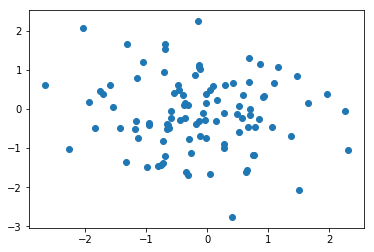

In [77]:
# 2차원 공간벡터
data = np.random.randn(200).reshape(100,2)
plt.scatter(data[:,0],data[:,1])

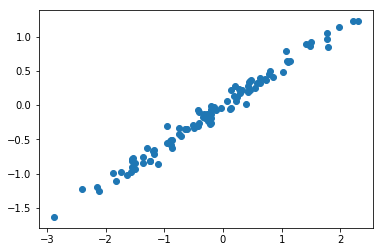

In [78]:
data2 = data.dot(cov_mat)
plt.scatter(data2[:,0],data2[:,1])

### 공분산행렬 스펙트럼 분해

In [79]:
eigen_value_1=lin.eig(cov_mat)[0][0]
eigen_value_2=lin.eig(cov_mat)[0][1]
print('Lamda_1: ',eigen_value_1)
#print('eigen_value_1에 따른 eigen_vector: ',eigen_vector_k1)
print('Lamda_2: ',eigen_value_2)
#print('eigen_value_2에 따른 eigen_vector: ',eigen_vector_k2)

Lamda_1:  1.3417411710475204
Lamda_2:  0.0734968210890517


In [80]:
eigen_vector_k1 = lin.eig(cov_mat)[1][:,0]
eigen_vector_k2 = lin.eig(cov_mat)[1][:,1]
print('eigen_value_1에 따른 eigen_vector: ',eigen_vector_k1)
print('eigen_value_2에 따른 eigen_vector: ',eigen_vector_k2)

eigen_value_1에 따른 eigen_vector:  [0.86666587 0.49888903]
eigen_value_2에 따른 eigen_vector:  [-0.49888903  0.86666587]


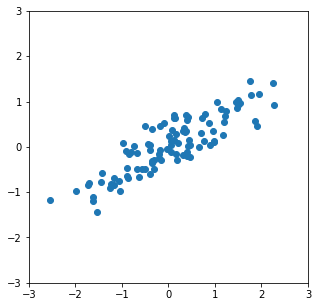

In [81]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2']);

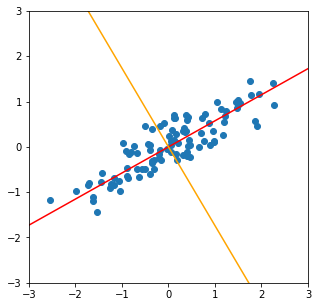

In [82]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2'])
# 고유벡터 시각화
plt.plot([-4*eigen_vector_k1[0],4*eigen_vector_k1[0]],[-4*eigen_vector_k1[1],4*eigen_vector_k1[1]],c='red')
plt.plot([-4*eigen_vector_k2[0],4*eigen_vector_k2[0]],[-4*eigen_vector_k2[1],4*eigen_vector_k2[1]],c='orange')

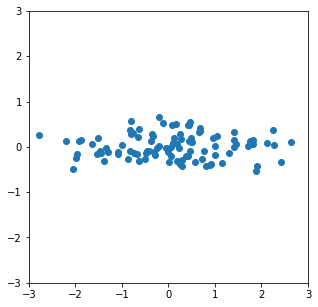

In [83]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 회전된 결과
PC1 = eigen_vector_k1.dot(X.T)
# PC1 = eigen_vector_k1[0]*X['x1'] + eigen_vector_k1[1]*X['x2']
PC2 = eigen_vector_k2.dot(X.T)
# PC2 = eigen_vector_k2[0]*X['x1'] + eigen_vector_k2[1]*X['x2']

plt.scatter(PC1,PC2);

In [86]:
eigen_vector_k1.shape

(2,)

In [85]:
PC1.shape

(100,)

### sklearn PCA

In [47]:
from sklearn.decomposition import PCA

# 2개로 축소 
model = PCA(n_components=2)

# fit : component 생성
# transform : 변환후 반환
# fit_transform : fit과 transform 동시 적용

pca_features = model.fit_transform(X)

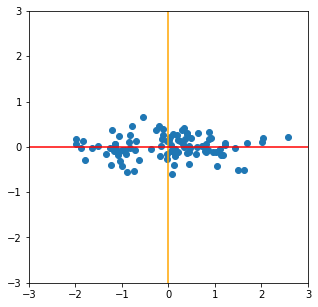

In [48]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

PC1 = pca_features[:,0]
PC2 = pca_features[:,1]

plt.scatter(PC1,PC2)

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

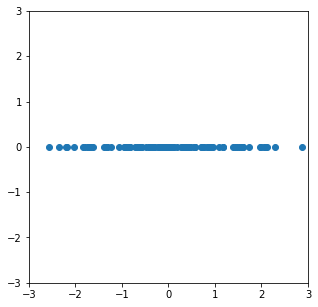

In [19]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 1개의 주성분만 표현
plt.scatter(PC1,len(PC1)*[0]);

# IRIS DATA

In [5]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# 데이터 로드
iris = datasets.load_iris()

In [7]:
labels = np.array(iris.target).reshape(150,)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### PCA

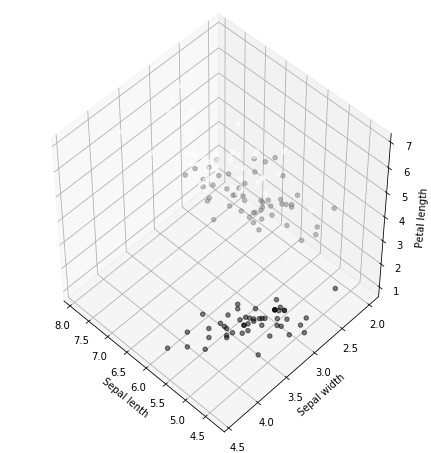

In [102]:
# 3차원
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

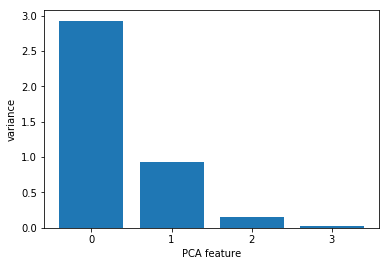

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA()

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

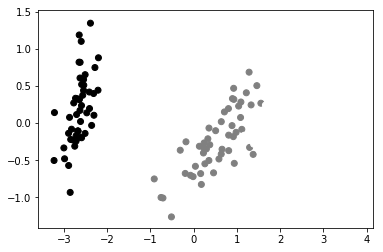

In [104]:
# 2차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels);
plt.show();

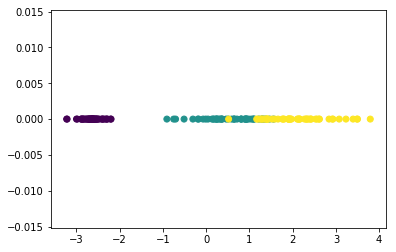

In [57]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels);
plt.show();

### TSNE

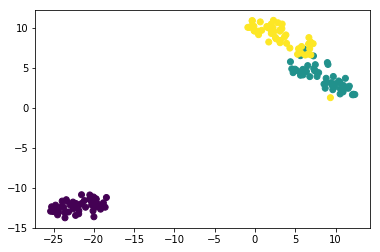

In [58]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()

# MNIST DATA

In [59]:
# 데이터 로드
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

X = mnist.data / 255.0
y = mnist.target

print (X.shape, y.shape)

(70000, 784) (70000,)


In [60]:
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print( 'Size of the dataframe: {}'.format(df.shape) )

Size of the dataframe: (70000, 785)


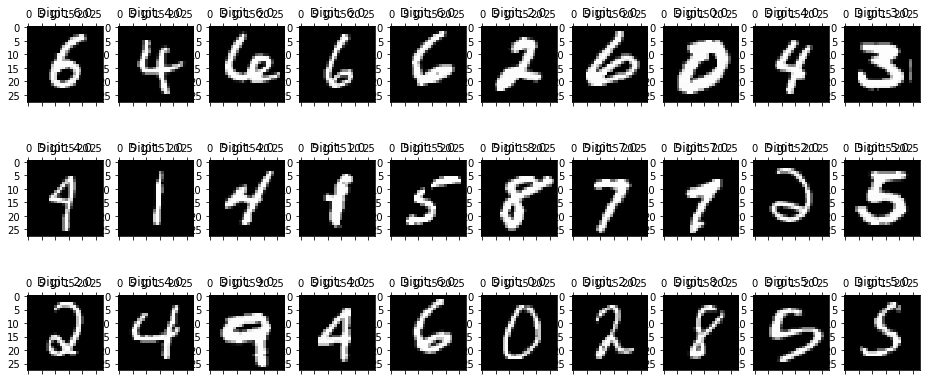

In [61]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax  = fig.add_subplot(3,10,i+1,title='Digit: ' + str(df.loc[rndperm[i], 'label']) )
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

### PCA

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principle component: [0.09746116 0.07155445 0.06149531]


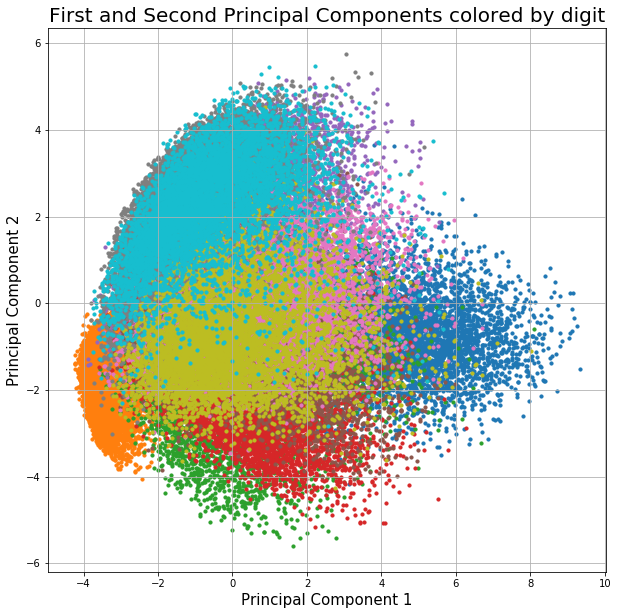

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("First and Second Principal Components colored by digit", fontsize = 20)

xf = df['pca-one']
yf = df['pca-two']
for i in range(10):
    ax.scatter(xf[y==i],yf[y==i],s=10)
ax.grid()

In [64]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print( 'Cumulative explained variation for 50 principal components:',np.sum(pca_50.explained_variance_ratio_))

Cumulative explained variation for 50 principal components: 0.8253933548245569


### TSNE

In [66]:
import time
from sklearn.manifold import TSNE

# 사용할 데이터,, 너무 오래걸려서 조금만
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds',time.time() - time_start )

KeyboardInterrupt: 

In [77]:
df_tsne = df.loc[rndperm[:n_sne],:].copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

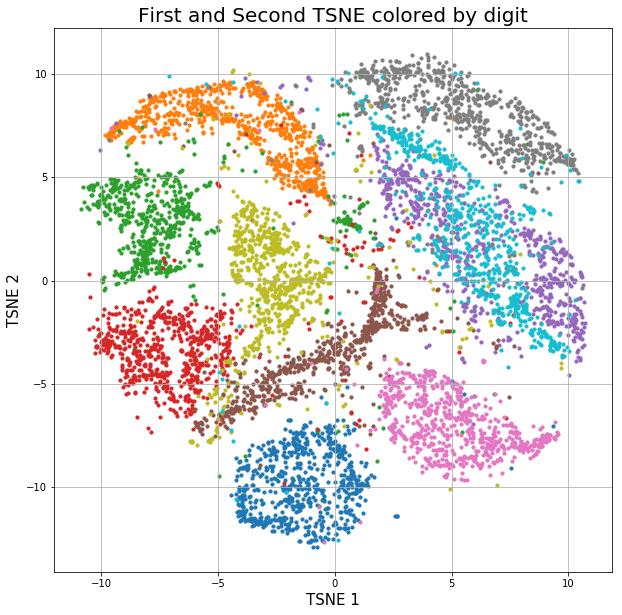

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title("First and Second TSNE colored by digit", fontsize = 20)

xf = df_tsne['x-tsne']
yf = df_tsne['y-tsne']
for i in range(10):
    ax.scatter(xf[y[rndperm[:n_sne]]==i],yf[y[rndperm[:n_sne]]==i],s=10)
ax.grid()


## Train & Test data

In [ ]:
pca_a = PCA()

pca_a.fit(X_train)
X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)